[2025-10-17 Fiddler](https://thefiddler.substack.com/p/can-you-reach-the-edge-of-the-square)
====================

Fiddler
-------
From symmetry, only need to consider 1/8th of the directions.

In [1]:
d = integral(1/2*1/cos(x),x,0,pi/4)*4/pi
d, numerical_approx(d)

((log(1/2*sqrt(2) + 1) - log(-1/2*sqrt(2) + 1))/pi, 0.561099852339180)

In [2]:
d1 = d.substitute(log(1/2*sqrt(2)+1) - log(-1/2*sqrt(2)+1) == log((1/2*sqrt(2)+1)/(-1/2*sqrt(2)+1)))
d1, numerical_approx(d1)

(log(-(sqrt(2) + 2)/(sqrt(2) - 2))/pi, 0.561099852339180)

In [3]:
d2 = d1.substitute(log(-(sqrt(2)+2)/(sqrt(2)-2)) == 2*log((sqrt(2)+2)/sqrt(2))).simplify_full()
d2, numerical_approx(d2)

(2*log(1/2*sqrt(2)*(sqrt(2) + 2))/pi, 0.561099852339180)

In [4]:
d3 = d2.substitute(1/2*sqrt(2)*(sqrt(2)+2) == 1+sqrt(2))
d3, numerical_approx(d3)

(2*log(sqrt(2) + 1)/pi, 0.561099852339180)

So the average distance is $\frac2\pi\log\left(1+\sqrt2\right)$.

Extra credit
------------

The transformation between spherical coordinates and Cartesian coordinates is

$$\begin{aligned}
    x &= r\sin\phi\cos\theta \\
    y &= r\sin\phi\sin\theta \\
    z &= r\cos\phi \\
\end{aligned}$$

Let the cube be $|x| \le 1/2$, $|y| \le 1/2$, $|z| \le 1/2$.
By symmetry, only need to consider $0 \le \phi \le \pi/2$ and $0 \le \theta \le \pi/4$.

When $\arctan\sqrt2 \le \phi \le \pi/2$, the direction is towards the side of the cube
for all $\theta$.

When $0 \le \phi \le \pi/4$, the direction is towards the top of the cube for all
$\theta$.

When $\pi/4 \le \phi \le \arctan\sqrt2$, the direction is towards the side of the cube
when $\theta \le \arccos(1/\tan\phi)$, and towards the top of the cube when
$\theta \ge \arccos(1/\tan\phi)$, as the meeting point is when $x = 1/2$ and $z = 1/2$.

When the direction is towards the side of the cube, $x = 1/2$, so $r = 1/(2\sin\phi\cos\theta)$.

When the direction is towards the top of the cube, $z = 1/2$, so $r = 1/(2\cos\phi)$.

In [5]:
phi,theta=var("phi,theta")
r1 = 8/pi^2*integral(integral(1/(2*sin(phi)*cos(theta)),theta,0,pi/4),phi,arctan(sqrt(2)),pi/2)
r2 = 8/pi^2*integral(integral(1/(2*cos(phi)),theta,0,pi/4),phi,0,pi/4)
#r3 = 8/pi^2*integral(integral(1/(2*cos(phi)),theta,arccos(1/tan(phi)),pi/4),phi,pi/4,arctan(sqrt(2)))
#r4 = 8/pi^2*integral(integral(1/(2*sin(phi)*cos(theta)),theta,0,arccos(1/tan(phi))),phi,pi/4,arctan(sqrt(2)))
r3p = 8/pi^2*integral(1/(2*cos(phi)),theta,arccos(1/tan(phi)),pi/4)
r4p = 8/pi^2*integral(1/(2*sin(phi)*cos(theta)),theta,0,arccos(1/tan(phi)))

No checks were made for singular points of antiderivative sin(sageVARphi)^-1/2*(-1/2*ln(-sin(sageVARtheta)+1)+1/2*ln(sin(sageVARtheta)+1)) for definite integration in [0,acos(tan(sageVARphi)^-1)]


The integrals over $\pi/4 \le \phi \le \arctan\sqrt2$ are beyond the computer's
capabilities, but, looking at a plot of the integrand, numerically integrating
it appears feasible.

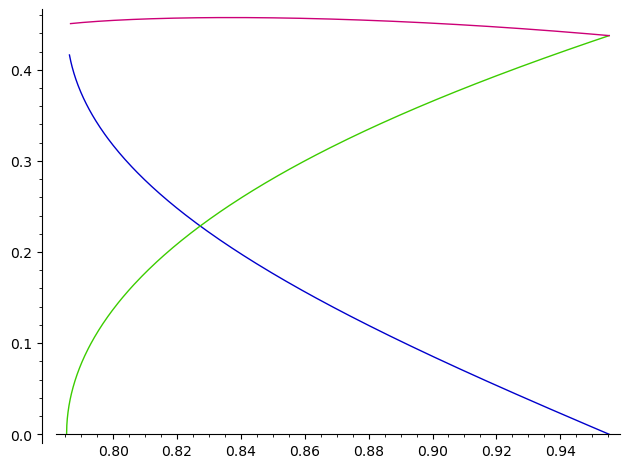

In [6]:
plot([r3p,r4p,r3p+r4p],pi/4,arctan(sqrt(2)))

It makes sense that the curves go to zero at the extremes.  On the left side,
only when $\theta$ is near zero is the direction towards the side of the cube,
where $x \approx 1/2$, $y \approx 0$, $z \approx 1/2$.
On the right side, only when $\theta$ is near $\pi/4$ is the direction towards
the top of the cube, where $x \approx 1/2$, $y \approx 1/2$, $z \approx 1/2$.

In [7]:
r3 = numerical_integral(r3p+r4p,pi/4,arctan(sqrt(2)))
r3

(0.0767734846177627, 4.3223089966425825e-11)

And the answer is approximately 0.5925.

In [8]:
numerical_approx(r1+r2+r3[0])

0.592536871914168

Numerical simulations
---------------------
[Numerical simulations](20251017.go) agree:

    $ go run 20251017.go
    0.561094
    0.592544